<a href="https://colab.research.google.com/github/naufalhawari/projects/blob/main/indo-telco-churn-analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/dataset/dsw.txt", delimiter = "\t")

In [ ]:
df.head()

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR)
0,0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,106.81667,-6.2,4210.7
1,1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,106.81667,-6.2,3511.3
2,2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,106.81667,-6.2,6983.6
3,3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,106.81667,-6.2,6503.9
4,4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,106.81667,-6.2,6942.0


In [ ]:
pd.get_dummies(df, drop_first=False)

,Customer ID,Tenure Months,Monthly Purchase (Thou. IDR),Longitude,Latitude,CLTV (Predicted Thou. IDR),Location_Bandung,Location_Jakarta,Device Class_High End,Device Class_Low End,...,Video Product_Yes,Use MyApp_No,Use MyApp_No internet service,Use MyApp_Yes,Payment Method_Credit,Payment Method_Debit,Payment Method_Digital Wallet,Payment Method_Pulsa,Churn Label_No,Churn Label_Yes
0,0,2,70.005,106.81667,-6.2,4210.7,False,True,False,False,...,False,True,False,False,False,False,True,False,False,True
1,1,2,91.910,106.81667,-6.2,3511.3,False,True,True,False,...,False,True,False,False,False,False,False,True,False,True
2,2,8,129.545,106.81667,-6.2,6983.6,False,True,True,False,...,True,False,False,True,False,False,False,True,False,True
3,3,28,136.240,106.81667,-6.2,6503.9,False,True,True,False,...,True,False,False,True,False,False,False,True,False,True
4,4,49,134.810,106.81667,-6.2,6942.0,False,True,True,False,...,True,False,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,72,27.495,106.81667,-6.2,6897.8,False,True,False,True,...,False,False,True,False,False,True,False,False,True,False
7039,7039,24,110.240,106.81667,-6.2,2782.0,False,True,False,False,...,True,False,False,True,False,False,True,False,True,False
7040,7040,72,134.160,106.81667,-6.2,7228.0,False,True,True,False,...,True,False,False,True,True,False,False,False,True,False
7041,7041,11,38.480,106.81667,-6.2,3630.9,False,True,False,False,...,False,True,False,False,False,False,False,True,True,False


## Lifelines

In [ ]:
!pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 8.9 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=89c4461289d7258fd61fa07089898119d3b29136fc99ee27f3e1797f779cdd4c
  Stored in directory: /root/.cache/pip/wheels/50/37/21/0a719b9d89c635e89ff24bd93b862882ad675279552013b2fb
Successfully built autograd-gamma


In [ ]:
df_encoded = pd.get_dummies(df.copy(), drop_first=False).astype(float).drop('Churn Label_No', axis=1)
df_encoded['Tenure Months'] += 1

In [ ]:
df_encoded.head()

,Customer ID,Tenure Months,Monthly Purchase (Thou. IDR),Longitude,Latitude,CLTV (Predicted Thou. IDR),Location_Bandung,Location_Jakarta,Device Class_High End,Device Class_Low End,...,Video Product_No internet service,Video Product_Yes,Use MyApp_No,Use MyApp_No internet service,Use MyApp_Yes,Payment Method_Credit,Payment Method_Debit,Payment Method_Digital Wallet,Payment Method_Pulsa,Churn Label_Yes
0,0.0,3.0,70.005,106.81667,-6.2,4210.7,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1.0,3.0,91.910,106.81667,-6.2,3511.3,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,2.0,9.0,129.545,106.81667,-6.2,6983.6,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,3.0,29.0,136.240,106.81667,-6.2,6503.9,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
4,4.0,50.0,134.810,106.81667,-6.2,6942.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
from lifelines import CoxPHFitter

drop_cols = ['Customer ID', 'Longitude', 'Latitude', 'CLTV (Predicted Thou. IDR)']

# Using Cox Proportional Hazards model
cph = CoxPHFitter(penalizer=0.0001)
cph.fit(df_encoded.drop(drop_cols, axis=1), 'Tenure Months', event_col='Churn Label_Yes')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 7043 total observations, 5174 right-censored observations>
             duration col = 'Tenure Months'
                event col = 'Churn Label_Yes'
                penalizer = 0.0001
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 7043
number of events observed = 1869
   partial log-likelihood = -14436.56
         time fit was run = 2025-09-12 13:48:15 UTC

---
                                       coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                              
Monthly Purchase (Thou. IDR)          -0.02      0.98      0.00           -0.02           -0.01                0.98                0.99
Location_Bandung                       0.01      1.01      1.87           -3.64            3.67                0.03               39.14
Location_Jakarta                      -0.01      0.99      1.87           -3.67            3.64                0.03               38.26
Device Class_High End                  0.68      1.97      1.70           -2.65            4.00                0.07               54.76
Device Class_Low End                  -0.31      0.74      2.71           -5.62            5.00                0.00              148.85
Device Class_Mid End                  -0.51      0.60      1.70           -3.83            2.82                0.02               16.78
Games Product_No                       0.52      1.68      1.73           -2.87            3.90                0.06               49.48
Games Product_No internet service     -0.31      0.74      2.71           -5.62            5.00                0.00              148.85
Games Product_Yes                     -0.38      0.69      1.73           -3.76            3.01                0.02               20.24
Music Product_No                       0.44      1.55      1.70           -2.89            3.76                0.06               42.99
Music Product_No internet service     -0.31      0.74      2.71           -5.62            5.00                0.00              148.85
Music Product_Yes                     -0.25      0.78      1.70           -3.57            3.08                0.03               21.71
Education Product_No                   0.34      1.40      1.70           -2.99            3.66                0.05               38.83
Education Product_No internet service -0.31      0.74      2.71           -5.62            5.00                0.00              148.85
Education Product_Yes                 -0.13      0.87      1.70           -3.46            3.19                0.03               24.28
Call Center_No                         0.34      1.41      1.86           -3.30            3.98                0.04               53.66
Call Center_Yes                       -0.34      0.71      1.86           -3.98            3.30                0.02               26.98
Video Product_No                       0.11      1.11      1.69           -3.20            3.42                0.04               30.50
Video Product_No internet service     -0.31      0.74      2.71           -5.62            5.00                0.00              148.85
Video Product_Yes                      0.11      1.12      1.69           -3.20            3.42                0.04               30.57
Use MyApp_No                           0.13      1.14      1.69           -3.18            3.44                0.04               31.25
Use MyApp_No internet service         -0.31      0.74      2.71           -5.62            5.00                0.00              148.85
Use MyApp_Yes                          0.09      1.09      1.69           -3.22            3.40                0.04               29.82
Payment Method_Credit                 -0.51      0.60      1.39           -3.22            2.21                0.04                9.10
Payment Method_

In [ ]:
from lifelines import CoxPHFitter

drop_cols = ['Customer ID', 'Longitude', 'Latitude', 'CLTV (Predicted Thou. IDR)']

# Using Cox Proportional Hazards model
cph = CoxPHFitter(baseline_estimation_method="spline", n_baseline_knots=5, penalizer=0.0001)
cph.fit(df_encoded.drop(drop_cols, axis=1), 'Tenure Months', event_col='Churn Label_Yes')
cph.print_summary()

model,lifelines.CoxPHFitter
duration col,'Tenure Months'
event col,'Churn Label_Yes'
penalizer,0.0001
l1 ratio,0.0
number of baseline knots,5
baseline estimation,spline
number of observations,7043
number of events observed,1869
log-likelihood,-53965.72
time fit was run,2025-09-12 13:48:16 UTC


<Axes: >

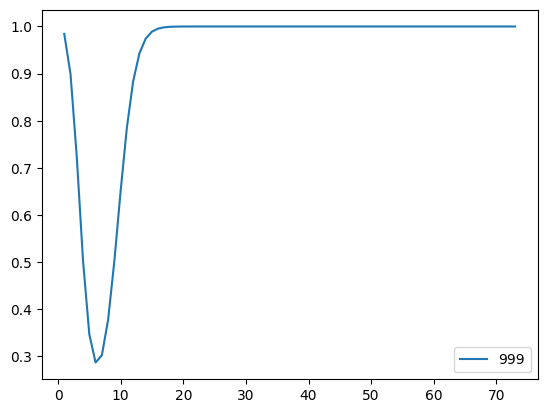

In [ ]:
cph.predict_survival_function(df_encoded.drop(drop_cols, axis=1).loc[999]).rename(columns={0:'CoxPHFitter'}).plot()

In [ ]:
from lifelines import WeibullAFTFitter

wft = WeibullAFTFitter()
wft.fit(df_encoded.drop(drop_cols, axis=1), 'Tenure Months', event_col='Churn Label_Yes')
wft.print_summary()

/usr/local/lib/python3.12/dist-packages/lifelines/fitters/__init__.py:2086: ApproximationWarning: The Hessian was not invertible. We will instead approximate it using the pseudo-inverse.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too.

Some ways to possible ways fix this:

0. Are there any lifelines warnings outputted during the `fit`?
1. Does a particularly large variable need to be centered to 0?
2. Inspect your DataFrame: does everything look as expected? Do you need to add/drop a constant (intercept) column?
3. Is there high-collinearity in the dataset? Try using the variance inflation factor (VIF) to find redundant variables.
4. Trying adding a small penalizer (or changing it, if already present). Example: `WeibullAFTFitter(penalizer=0.01).fit(...)`.
5. Are there any extreme outliers? Try modeling them or dropping them to see if it helps convergence.

  warnings.warn(warning_text, exceptions.ApproximationWarning)


<lifelines.WeibullAFTFitter: fitted with 7043 total observations, 5174 right-censored observations>
             duration col = 'Tenure Months'
                event col = 'Churn Label_Yes'
   number of observations = 7043
number of events observed = 1869
           log-likelihood = -9526.61
         time fit was run = 2025-09-12 13:48:26 UTC

---
                                               coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
param   covariate                                                                                                                              
lambda_ Call Center_No                        -0.53      0.59      0.04           -0.61           -0.45                0.54                0.64
        Call Center_Yes                        0.19      1.21      0.06            0.07            0.32                1.07                1.37
        Device Class_High End                 -0.82      0.44      0.11           -1.04           -0.61                0.35                0.54
        Device Class_Low End                   0.22      1.24      0.02            0.18            0.25                1.20                1.28
        Device Class_Mid End                   0.43      1.53      0.06            0.32            0.54                1.37                1.71
        Education Product_No                  -0.46      0.63      0.04           -0.53           -0.39                0.59                0.68
        Education Product_No internet service  0.22      1.24      0.02            0.18            0.25                1.20                1.28
        Education Product_Yes                  0.03      1.03      0.05           -0.07            0.14                0.93                1.15
        Games Product_No                      -0.65      0.52      0.04           -0.73           -0.58                0.48                0.56
        Games Product_No internet service      0.22      1.24      0.02            0.18            0.25                1.20                1.28
        Games Product_Yes                      0.28      1.32      0.06            0.15            0.40                1.16                1.49
        Location_Bandung                      -0.18      0.84      0.05           -0.27           -0.08                0.76                0.92
        Location_Jakarta                      -0.16      0.85      0.05           -0.25           -0.07                0.78                0.93
        Monthly Purchase (Thou. IDR)           0.02      1.02      0.00            0.01            0.02                1.01                1.02
        Music Product_No                      -0.57      0.57      0.04           -0.64           -0.50                0.53                0.61
        Music Product_No internet service      0.22      1.24      0.02            0.18            0.25                1.20                1.28
        Music Product_Yes                      0.15      1.16      0.05            0.04            0.25                1.04                1.29
        Payment Method_Credit                  0.44      1.55      0.06            0.32            0.56                1.37                1.76
        Payment Method_Debit                   0.41      1.50      0.06            0.29            0.53                1.33                1.69
        Payment Method_Digital Wallet         -0.51      0.60      0.06           -0.62           -0.39                0.54                0.68
        Payment Method_Pulsa                  -0.56      0.57      0.04           -0.64           -0.48                0.53                0.62
        Use MyApp_No                          -0.26      0.77      0.03           -0.32           -0.19                0.73                0.82
        Use MyApp_No internet service          0.22      1.24      0.02            0.18            0.25                1.20                1.28
        Use MyApp_Yes                         -0.1